# Monte Carlo Portfolio Allocation Simulation Notebook

The purpose is to use Monte Carlo Methods to construct an optimum portfolio according to Modern Portfolio Theory.  I have replicated this notebook as part of the learning process.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import yfinance as yf
sns.set()
import warnings
warnings.filterwarnings('ignore')
from itertools import product

To build our portfolio, we will focus on stocks from Apple, Walmart, Tesla, General Electric, Amazon and Deutsche Bank on the arbitrary time period from 2013-01-01 to 2018-01-01.

We focus on the adjusted close price of each company and with that, we obtain the daily logarithmic returns:

$$R_i = \ln(r_i/r_{i-1})$$

In [56]:
stock =['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']
start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')
data = yf.download(stock, start=start, end=end)
complete_data = yf.download(stock, start=start, end=end)
daily_returns = (data['Close']/data['Close'].shift(1))-1
returns = np.log(data['Close']/data['Close'].shift(1))

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed


In [57]:
complete_data.head()

Price           Close                                                      \
Ticker           AAPL     AMZN         DB         GE      TSLA        WMT   
Date                                                                        
2013-01-02  16.647179  12.8655  37.576366  82.043266  2.357333  17.898836   
2013-01-03  16.437065  12.9240  37.303467  81.120529  2.318000  17.785089   
2013-01-04  15.979208  12.9575  37.898872  81.504959  2.293333  17.852304   
2013-01-07  15.885217  13.4230  38.684471  81.235870  2.289333  17.681690   
2013-01-08  15.927962  13.3190  39.205444  80.351616  2.245333  17.730808   

Price            High                                 ...       Open  \
Ticker           AAPL     AMZN         DB         GE  ...         DB   
Date                                                  ...              
2013-01-02  16.828196  12.9050  37.683866  82.812182  ...  37.625982   
2013-01-03  16.666596  13.0440  37.609437  82.619912  ...  37.220775   
2013-01-04  16.331843  12.9900  37.940220  81.735638  ...  37.410975   
2013-01-07  16.048949  13.4865  38.849858  81.581883  ...  38.667931   
2013-01-08  16.127475  13.4490  39.428719  81.197423  ...  39.420451   

Price                                          Volume                     \
Ticker             GE      TSLA        WMT       AAPL      AMZN       DB   
Date                                                                       
2013-01-02  82.696843  2.333333  17.818700  560518000  65420000  1515094   
2013-01-03  82.581464  2.345333  17.901416  352965200  55018000  1489313   
2013-01-04  81.543408  2.320000  17.766998  594333600  37484000   732238   
2013-01-07  81.351210  2.320000  17.792847  484156400  98200000  1723646   
2013-01-08  81.120532  2.300000  17.650673  458707200  60214000  1607842   

Price                                     
Ticker            GE      TSLA       WMT  
Date                                      
2013-01-02   9617131  17922000  31172400  
2013-01-03  10122010  11130000  26730300  
2013-01-04   6218673  10110000  19314000  
2013-01-07   6832995   6630000  18604200  
2013-01-08   8355978  19260000  17600700  

[5 rows x 30 columns]

In [58]:
returns.head()

Ticker,AAPL,AMZN,DB,GE,TSLA,WMT
Date,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012702,0.004537,-0.007289,-0.011311,-0.016826,-0.006375
2013-01-04,-0.028250,0.002589,0.015835,0.004728,-0.010699,0.003772
2013-01-07,-0.005899,0.035295,0.020517,-0.003307,-0.001746,-0.009603
2013-01-08,0.002687,-0.007778,0.013377,-0.010945,-0.019407,0.002774


Text(0, 0.5, 'Close Price')

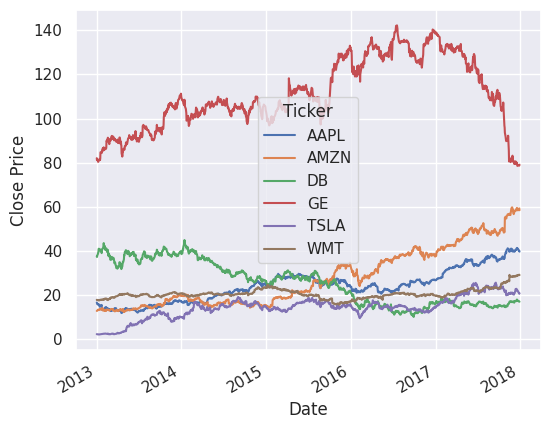

In [59]:
data['Close'].plot(figsize=(6, 5))
plt.ylabel("Close Price")

Text(0, 0.5, 'Close Price')

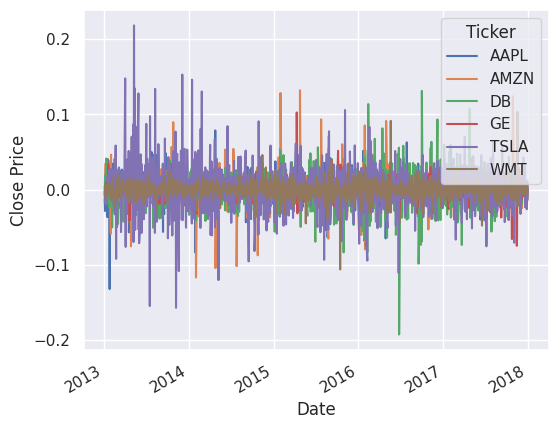

In [60]:
returns.plot(figsize=(6, 5))
plt.ylabel("Close Price")

array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'AMZN'}>],
       [<Axes: title={'center': 'DB'}>, <Axes: title={'center': 'GE'}>],
       [<Axes: title={'center': 'TSLA'}>,
        <Axes: title={'center': 'WMT'}>]], dtype=object)

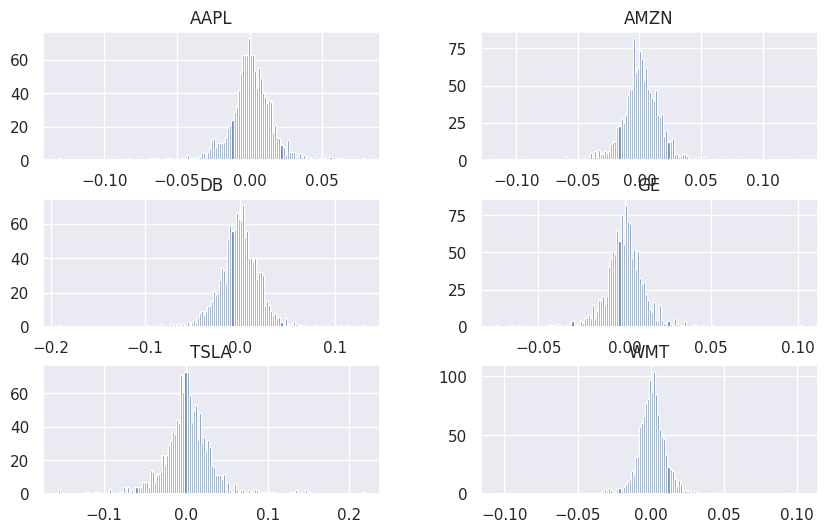

In [61]:
returns.hist(figsize=(10, 6), bins=(150))

In [62]:
print('Annualized Returns')
print(returns.mean()*252)
print('\n')
print('Anualized Covariance Matrix')
print(returns.cov()*252)

Annualized Returns
Ticker
AAPL    0.174178
AMZN    0.303286
DB     -0.158121
GE     -0.007366
TSLA    0.435759
WMT     0.097274
dtype: float64


Anualized Covariance Matrix
Ticker      AAPL      AMZN        DB        GE      TSLA       WMT
Ticker                                                            
AAPL    0.057283  0.017835  0.018476  0.010838  0.020287  0.007260
AMZN    0.017835  0.083572  0.024446  0.012930  0.037953  0.007372
DB      0.018476  0.024446  0.122065  0.023986  0.025966  0.011154
GE      0.010838  0.012930  0.023986  0.034062  0.015416  0.007548
TSLA    0.020287  0.037953  0.025966  0.015416  0.219997  0.008831
WMT     0.007260  0.007372  0.011154  0.007548  0.008831  0.029096


<Axes: xlabel='Ticker', ylabel='Ticker'>

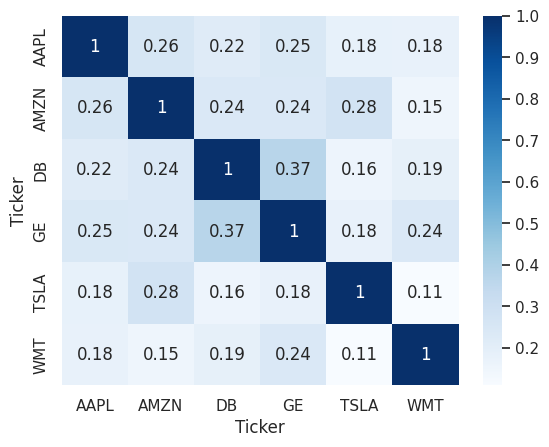

In [10]:
sns.heatmap(returns.corr(), cmap= 'Blues', annot=True)

Now we need to build a portfolio (a combination of stocks in this case).  We begin by defining a function that produce random weights $W_i$.  Clearly we ask that $\sum_i W_i=1$, where the index $i$ refers to the different stocks in our portfolio.

In [50]:
def initial_weights():
  weights = np.random.random(len(stock))
  weights /= np.sum(weights)
  return weights

We Annualised portfolio return is given by $\mu^{\text{Annual}}_P = \sum_i W_i \mu^{\text{Annual}}_i$

In [51]:
def calculate_portfolio_returns(returns, weights):
  portfolio_returns = np.sum(returns.mean()*weights)*252
  print("Expected Portfolio Return:", portfolio_returns)
  return portfolio_returns

And similarly, we compute the portfolio yearly standar deviation as $\sigma^{\text{Annual}}_P = \sqrt{\sum_i W_i \sigma^{\text{Annual}}_i}$

In [52]:
def calculate_portfolio_variance(returns, weights):
    portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    print('Expected Variance:', portfolio_variance)
    return portfolio_variance

In [53]:
weights = initial_weights()
weights.round(3)

array([0.066, 0.028, 0.148, 0.221, 0.23 , 0.307])

In [54]:
calculate_portfolio_returns(returns,weights)

Expected Portfolio Return: 16.072243275320965


np.float64(16.072243275320965)

In [55]:
calculate_portfolio_variance(returns,weights)

AttributeError: 'numpy.float64' object has no attribute 'cov'

So what do we do now?  Where does Monte-Carlo simulation come into play?  We can simulate a large number of portfolios via MC and let's see what happens.

We now use Monte Carlo to generate 50,000 different, random weights $W_i$'s. This will give us the same number of different portfolio allocations.

In [19]:
num_weights = 50000

def generate_portfolios(weights, returns):

    preturns = []
    pvariances = []

    # Monte Carlo simulation: We generate several randon weights and their correspondig portfolios

    for i in range(num_weights):
        weights = np.random.random(len(stock))
        weights /= np.sum(weights)
        preturns.append(np.sum(returns.mean()*weights)*252)
        pvariances.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))

    preturns = np.array(preturns)
    pvariances = np.array(pvariances)
    return preturns, pvariances


In [25]:
def plot_portfolios(returns, variances):
    plt.figure(figsize=(6,4))
    plt.scatter(variances, returns, c = (returns-0.014)/variances, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label = 'Sharpe Ratio')
    plt.show()

In [21]:
monte_carlo_portfolios = generate_portfolios(weights, returns)
preturns = monte_carlo_portfolios[0]
pvariances = monte_carlo_portfolios[1]

Let's plot this ensemble of portfolios!

Now we see the boundary of the portfolios form the classical portfolio curve as we plot the expected variance vs expected return curve.

We note that the color scale correspond to the value of the Sharpe ratio of each portfolio radomnly generated. The lighter the color, the higher the value of the Sharpe ratio.

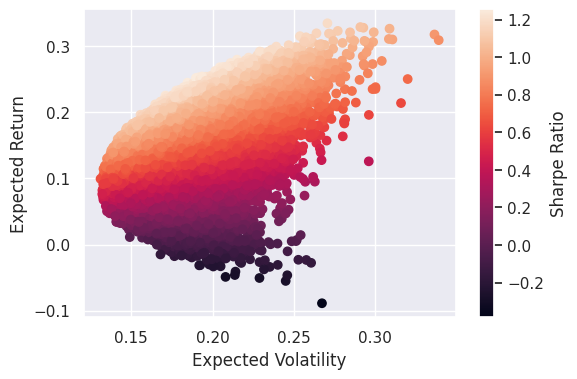

In [26]:
plot_portfolios(preturns, pvariances)

We now find the optimal porfolio. To do this, we use SciPy's optimization algorithms.

In [27]:
import scipy.optimize as optimization

In [32]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean()*weights)*252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([portfolio_return, portfolio_volatility, (portfolio_return-0.014)/portfolio_volatility])

Our optimization problem consists of maximizing the Sharpe ratio.  Sharpe ratio is the expected return over expected variance.  Intuitively, we can think of high sharpe ratio as higher return with lower risk

In [28]:
def min_func_sharpe(weights, returns):
    return -statistics(weights, returns)[2]

This is our optimization algorithm. Here we include the constrains on the weights: the sum of weights is equal to 1. Any weight seed will lead us to the optimum portfolio allocation. To optimize, we use the Sequential Least Squares Programming method.

In [29]:
# f(x) = 0 is the function to minimize.

def optimize_portfolio(weights, returns):
    constraints = ({'type': 'eq','fun': lambda x: np.sum(x)-1} ) # The sum of weights is 1
    bounds = tuple((0,1) for x in range(len(stock))) # Individual weights can at most be 1: I invest everything in 1 stock
    optimum = optimization.minimize(fun = min_func_sharpe, x0 = weights, args = returns, method = 'SLSQP', bounds = bounds, constraints=constraints)
    return optimum

In [33]:
optimum = optimize_portfolio(initial_weights(),returns)

In [34]:
print(optimum['x'].round(3))

[0.208 0.368 0.    0.    0.197 0.226]


In [35]:
optimum['x'].sum()

np.float64(1.0000000000000004)

In [36]:
print(statistics(optimum['x'], returns).round(3))

[0.256 0.191 1.267]


In [37]:
# Optimal portfolio according to weights.
def print_optimal_portfolio(optimum, returns):
    print('\n')
    for i in range(len(stock)):
        print('- Optimal Weight for {} is: {}'.format(stock[i], optimum['x'][i].round(3)))
    print('\n')
    print('**********************************************')
    print('\n')
    print('Optimal Weights: ', optimum['x'].round(3))
    print('Expected return, volatility and Sharpe Ratio: ', statistics(optimum['x'], returns).round(3))

In [41]:
def show_optimal_portfolio(optimum, returns, preturns, pvariances):
    plt.figure(figsize=(6,5))
    #plt.plot(x = statistics(optimum['x'], returns)[1],y = statistics(optimum['x'], returns)[0], markersize = 2.0)
    plt.scatter(pvariances, preturns, c = (preturns-0.014)/pvariances, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label = 'Sharpe Ratio')
    plt.scatter(x = statistics(optimum['x'], returns)[1],y = statistics(optimum['x'], returns)[0], c = 'b' )
    #plt.plot(x = statistics(optimum['x'], returns)[1],y = statistics(optimum['x'], returns)[0], color = 'r',markersize = 200.0)
    plt.show()

Let's put our highest sharpe ratio point on the plot and see what happens

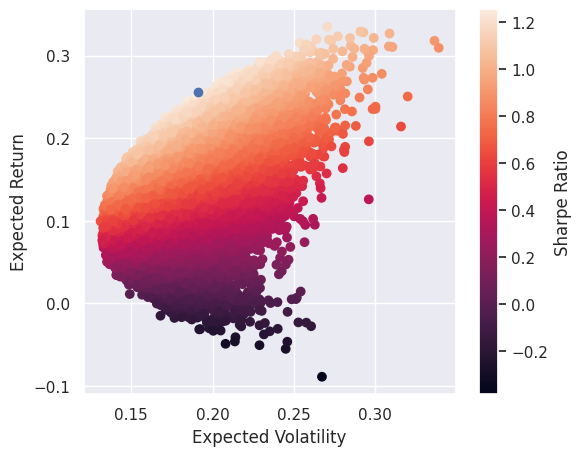

In [42]:
show_optimal_portfolio(optimum, returns, preturns, pvariances)

From above, we see that the blue dot is in the middle of high sharpe ratio region(this as a sanity check).

Below we print out the optimal portfolio

In [43]:
 print_optimal_portfolio(optimum, returns)



- Optimal Weight for AAPL is: 0.208
- Optimal Weight for WMT is: 0.368
- Optimal Weight for TSLA is: 0.0
- Optimal Weight for GE is: 0.0
- Optimal Weight for AMZN is: 0.197
- Optimal Weight for DB is: 0.226


**********************************************


Optimal Weights:  [0.208 0.368 0.    0.    0.197 0.226]
Expected return, volatility and Sharpe Ratio:  [0.256 0.191 1.267]


Remember what was the portfolio with the initial weights? Let's compare them

In [63]:
rt = calculate_portfolio_returns(returns,weights)
var = calculate_portfolio_variance(returns,weights)
print("Sharpe ratio: ", rt/var)

Expected Portfolio Return: 0.12511691031240682
Expected Variance: 0.17281575857106077
Sharpe ratio:  0.7239901693395601


So we see our optimisation indeed works and we dramatically improved our sharpe ratio!